In [1]:
import pandas as pd
import numpy as np
import logging
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
def null_values_check(df): 

    try:
        
        if(df.isnull().values.any() == True):
            
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)


dataset_name = 'chronic_kidney_disease.csv'


try:
    
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    
    null_values_check(chronic_kidney_disease_dataframe)
   
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
    
   
    target_class = chronic_kidney_disease_dataframe['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = chronic_kidney_disease_dataframe.iloc[:, 0:24]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
    
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    
    
    
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
   
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    
   
    train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3)
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(train_target.shape[0]))
    print('Size of test dataset: ' + str(test_target.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
p

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 10}

The best model after gridsearch is:
 RandomForestClassifier(min_samples_split=4, n_estimators=10, random_state=0)

Precision: 0.8837209302325582
Accuracy: 0.9583333333333334
Recall: 1.0
F1-score: 0.9382716049382717

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        82
           1       0.88      1.00      0.94        38

    accuracy                           0.96       120
   macro avg       0.94      0.97      0.95       120
weighted avg       0.96      0.96      0.96       120


Confusion Matrix: 
[[77  5]
 [ 0 38]]


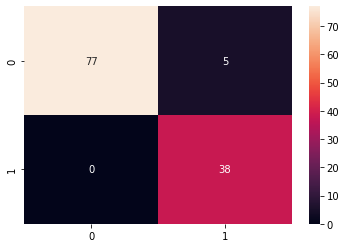

In [5]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#initialise the random forest Model
random_forest_model = RandomForestClassifier(random_state = 0)

#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100], 
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5], 
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rf_grid_search = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')
#fit the data to the grid
rf_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rf_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rf_grid_search.best_estimator_))

#Random Forest predictions on test features
rf_prediction = rf_grid_search.predict(test_features)

#display KNN classification Metrices for Decision Tree
print('\nPrecision: ' + str(metrics.precision_score(test_target, rf_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, rf_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, rf_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, rf_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, rf_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, rf_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, rf_prediction), annot = True)
plt.show()

In [1]:
joblib.dump(random_forest_model,"kidneymodel")

NameError: name 'joblib' is not defined

In [2]:
import joblib

In [3]:
joblib.dump(random_forest_model,"kidneymodel")

NameError: name 'random_forest_model' is not defined